# DATA422: Data Wrangling Project (R part) - Yu Sun (Nina)

The following code was used to read the csv file and wrangling, visualizing the dataset as well as analyzing the relationship between suicide rate and Log GDP, social support rate, healthy life expectancy in different countries and present the result by scatter plot and bar plot.

In [261]:
setwd("C:/Users/ninas/Desktop/DATA422/Group Project")

In [262]:
library(readr)
library(readxl)
library(data.table)
library(ggplot2)
library(tidyverse)
library(reshape2)
library(dplyr)
library(countrycode)
library(tidyverse)
#load necessary libraries for wrangling

## Suicide rate for male and female in different countries

The dataset is contains suicide rate for the countries in an unsorted order, in this part we have filtered the countries into different continents like Europe and Asia, this will make analysis easier in the further stage.
Library "countrycode" was used here to generate continents regarding different country code.

In [276]:
suicide_happiness <- read.csv("suicide_estimates_world_happiness.csv")#read suicide happiness dataset

In [286]:
suicide_gender <- suicide_happiness[,c(3,4,15,16)]#choose the columns that contain suicide rate regarding gender, year and country

In [287]:
head(suicide_gender)

country,year,Female,Male
Afghanistan,2010,1.4,8.6
Afghanistan,2015,1.5,7.8
Afghanistan,2016,1.5,7.6
Albania,2010,6.1,9.5
Albania,2015,4.4,7.6
Albania,2016,4.7,7.9


In [288]:
df_male <- data.frame(country = suicide_gender[,1])#get the country column

In [289]:
colnames(df_male) <- "country" #rename the country column

In [290]:
df_male$continent <- factor(countrycode(sourcevar = df_male[,"country"],
                                        origin = "country.name",
                                        destination = "continent"))
#generate continent for different countries to sort them into different continent groups

In [291]:
head(df_male)

country,continent
Afghanistan,Asia
Afghanistan,Asia
Afghanistan,Asia
Albania,Europe
Albania,Europe
Albania,Europe


In [292]:
gender_rate1 <- cbind(suicide_gender, df_male[,2]) #combine the continent table to the original dataset

In [293]:
gender_rate <- filter(gender_rate1, year == 2016)#get the data from year 2016 

In [294]:
colnames(gender_rate) <- c("country", "year", "female", "male", "continent") #rename clumn names

In [295]:
head(gender_rate)

country,year,female,male,continent
Afghanistan,2016,1.5,7.6,Asia
Albania,2016,4.7,7.9,Europe
Algeria,2016,1.7,4.7,Africa
Argentina,2016,3.5,15.1,Americas
Armenia,2016,2.8,10.8,Asia
Australia,2016,7.0,19.5,Oceania


Now we have got the table for suicide rate for male and female with an extra column of continent. And we have filtered the data using year = 2016 to get the analysis on the most recent dataset. And in the code below, we have generated separate tables for countries in Oceania, Africa, Asia, Americas and Europe.

### Suicide rate for Oceania countries

In [296]:
Oceania_rate <- filter(gender_rate, continent =="Oceania") #get Oceania countries data

In [297]:
head(Oceania_rate)

country,year,female,male,continent
Australia,2016,7.0,19.5,Oceania
New Zealand,2016,6.6,17.9,Oceania


In [298]:
Oceania_rate <- Oceania_rate[,c(1,3,4)]##data for oceania countries in 2016

In [299]:
Oceania_rate <- melt(Oceania_rate)
head(Oceania_rate) #use melt function to change the table format

Using country as id variables


country,variable,value
Australia,female,7.0
New Zealand,female,6.6
Australia,male,19.5
New Zealand,male,17.9


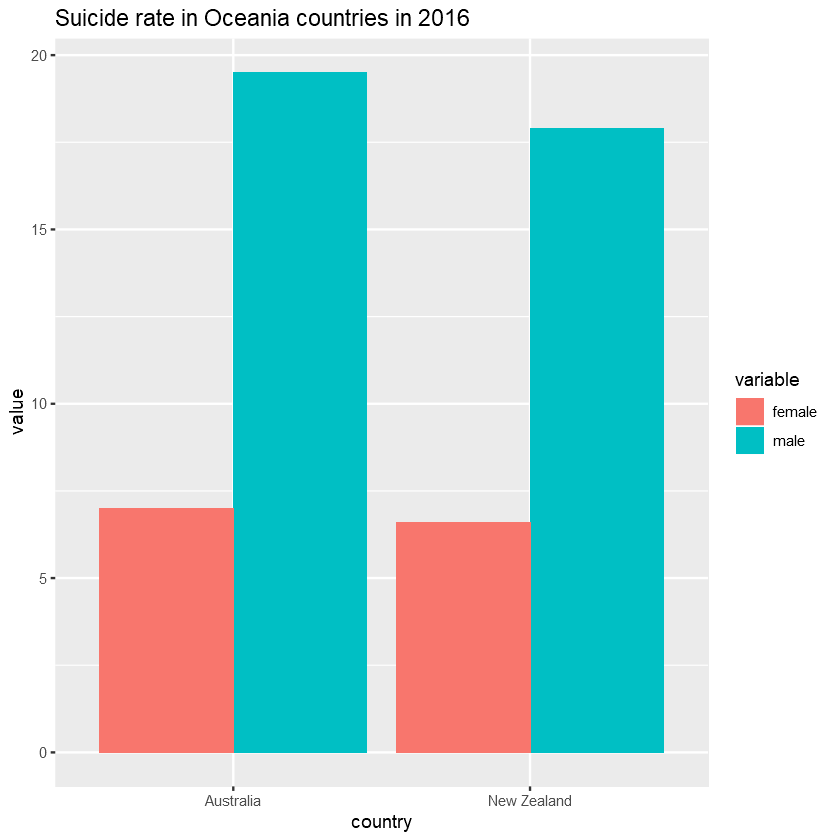

In [301]:
ggplot(Oceania_rate, aes(x=country, y=value, fill=variable)) +
  geom_bar(stat="identity",position=position_dodge())+ggtitle("Suicide rate in Oceania countries in 2016") 
#scatterplot show the suicide rate among male and female

The graph shows suicide rate for male and female in Australia and New Zealand in 2016. And it is clear that male have a higher suicide rate than female in both these two countries.

### Suicide rate for Asia countries

In [302]:
Asia_rate <- filter(gender_rate, continent == "Asia") #getAsia countries data

In [303]:
head(Asia_rate) 

country,year,female,male,continent
Afghanistan,2016,1.5,7.6,Asia
Armenia,2016,2.8,10.8,Asia
Azerbaijan,2016,1.1,4.2,Asia
Bahrain,2016,1.9,8.4,Asia
Bangladesh,2016,7.0,4.7,Asia
Cambodia,2016,2.9,7.8,Asia


In [304]:
Asia_rate <- Asia_rate[,c(1,3,4)]
head(Asia_rate)#select columns needed for plot

country,female,male
Afghanistan,1.5,7.6
Armenia,2.8,10.8
Azerbaijan,1.1,4.2
Bahrain,1.9,8.4
Bangladesh,7.0,4.7
Cambodia,2.9,7.8


In [306]:
Asia_rate <- melt(Asia_rate)
head(Asia_rate) #melt the table into different format for plot

Using country as id variables


country,variable,value
Afghanistan,female,1.5
Armenia,female,2.8
Azerbaijan,female,1.1
Bahrain,female,1.9
Bangladesh,female,7.0
Cambodia,female,2.9


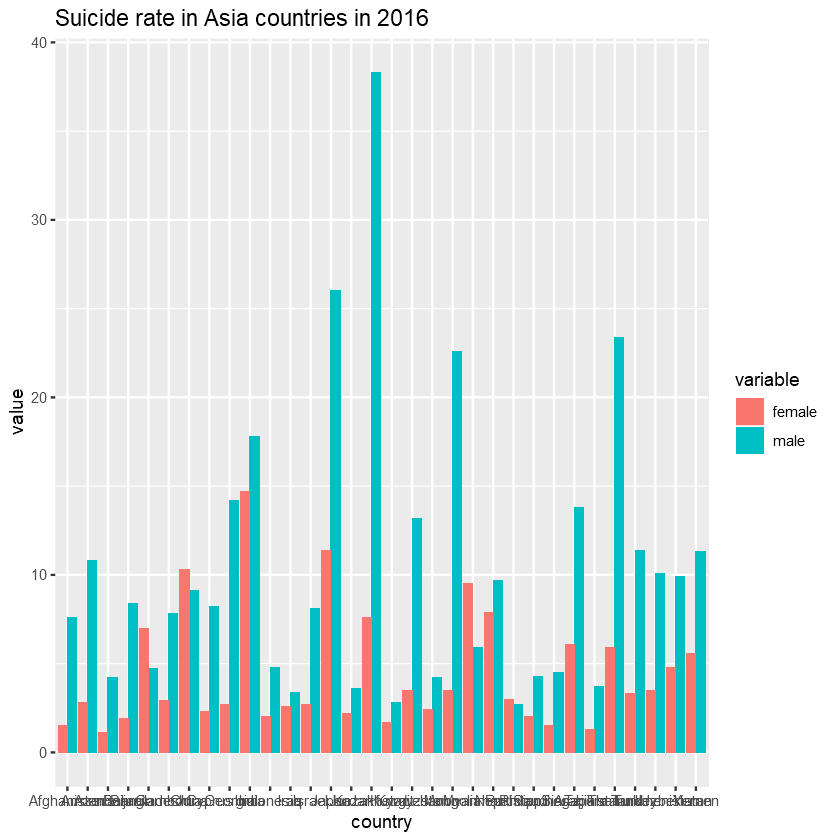

In [307]:
ggplot(Asia_rate, aes(x=country, y=value, fill=variable)) +
  geom_bar(stat="identity",position=position_dodge())+ggtitle("Suicide rate in Asia countries in 2016")#scatterplot

The graph shows that in Asia countries, male also have a higher suicide rate than female in all the countries.

In [308]:
Africa_rate <- filter(gender_rate, continent == "Africa")#get Africa data

In [309]:
head(Africa_rate)

country,year,female,male,continent
Algeria,2016,1.7,4.7,Africa
Benin,2016,5.9,13.9,Africa
Botswana,2016,4.5,14.2,Africa
Burkina Faso,2016,5.3,10.2,Africa
Cameroon,2016,7.4,17.1,Africa
Central African Republic,2016,4.0,11.5,Africa


In [310]:
Africa_rate <- Africa_rate[,c(1,3,4)]#select columns needed

In [311]:
Africa_rate <- melt(Africa_rate)
head(Africa_rate)

Using country as id variables


country,variable,value
Algeria,female,1.7
Benin,female,5.9
Botswana,female,4.5
Burkina Faso,female,5.3
Cameroon,female,7.4
Central African Republic,female,4.0


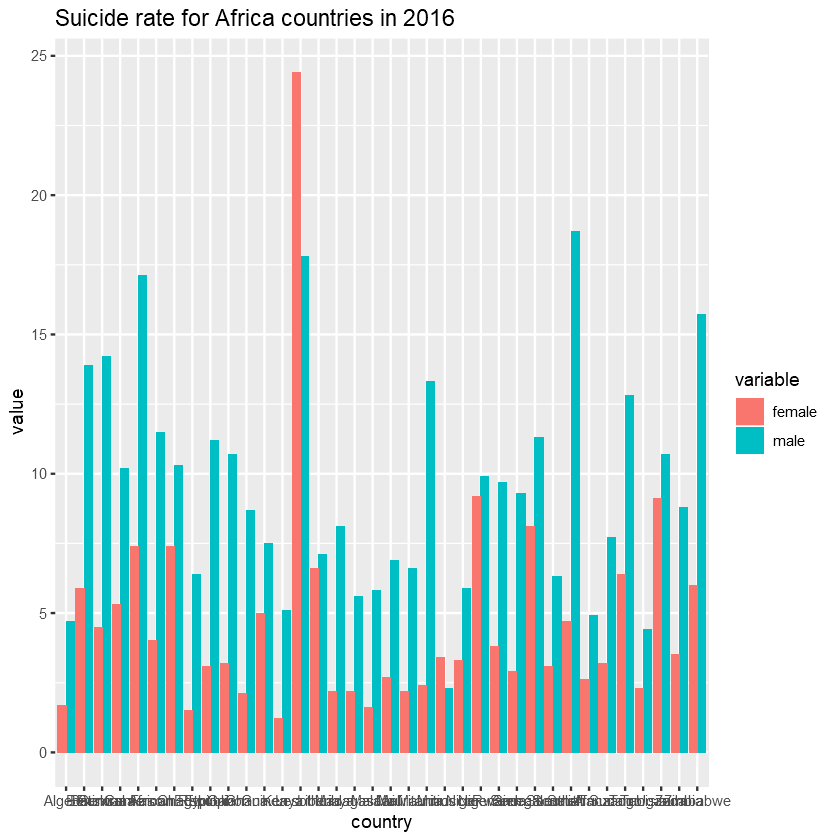

In [312]:
ggplot(Africa_rate, aes(x=country, y=value, fill=variable)) +
  geom_bar(stat="identity",position=position_dodge())+ggtitle("Suicide rate for Africa countries in 2016") #barchart

The situation is the same for countries in Africa, male tend to have a higher suicide rate than female.

In [313]:
America_rate <- filter(gender_rate, continent=="Americas") #get Americas data

In [314]:
head(America_rate)

country,year,female,male,continent
Argentina,2016,3.5,15.1,Americas
Brazil,2016,3.1,10.0,Americas
Canada,2016,7.0,18.1,Americas
Chile,2016,4.0,17.2,Americas
Colombia,2016,2.8,11.6,Americas
Costa Rica,2016,2.4,13.5,Americas


In [315]:
America_rate <- America_rate[,c(1,3,4)] #select necessary columns

In [316]:
America_rate <- melt(America_rate)
head(America_rate) 

Using country as id variables


country,variable,value
Argentina,female,3.5
Brazil,female,3.1
Canada,female,7.0
Chile,female,4.0
Colombia,female,2.8
Costa Rica,female,2.4


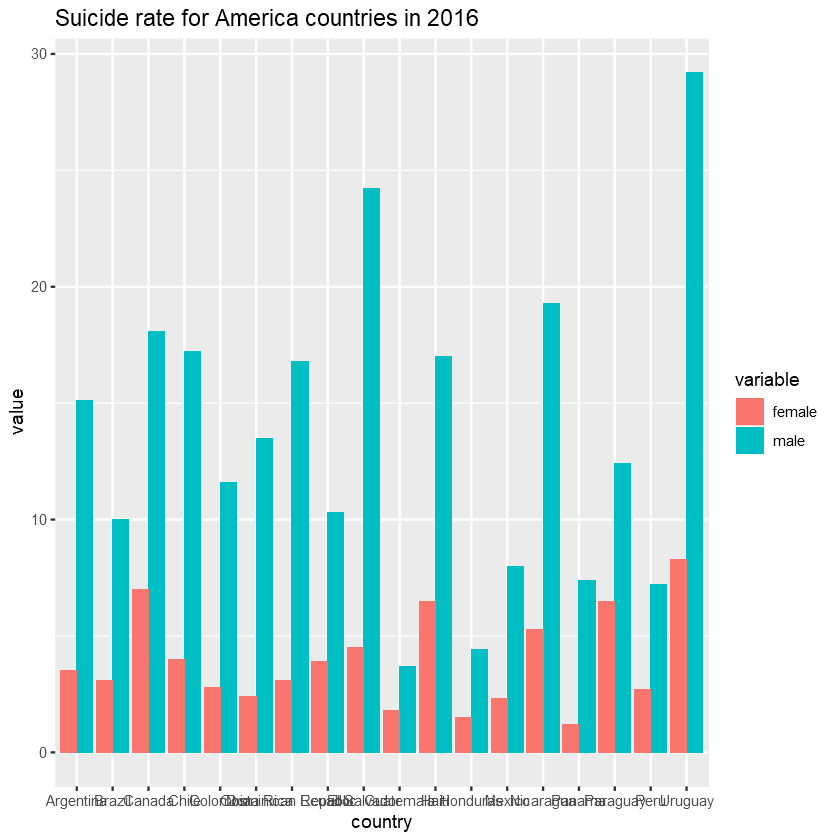

In [317]:
ggplot(America_rate, aes(x=country, y=value, fill=variable)) +
  geom_bar(stat="identity",position=position_dodge())+ggtitle("Suicide rate for America countries in 2016")

In [37]:
Europe_rate <- filter(gender_rate, continent =="Europe") #get Europe data

In [38]:
head(Europe_rate)

country,year,female,male,continent
Albania,2016,4.7,7.9,Europe
Austria,2016,7.7,23.9,Europe
Belarus,2016,8.2,46.9,Europe
Belgium,2016,13.8,27.8,Europe
Bosnia and Herzegovina,2016,3.6,14.1,Europe
Bulgaria,2016,5.1,18.2,Europe


In [67]:
Europe_rate <- Europe_rate[,c(1,3,4)]

In [68]:
Europe_rate <- melt(Europe_rate)

Using country as id variables


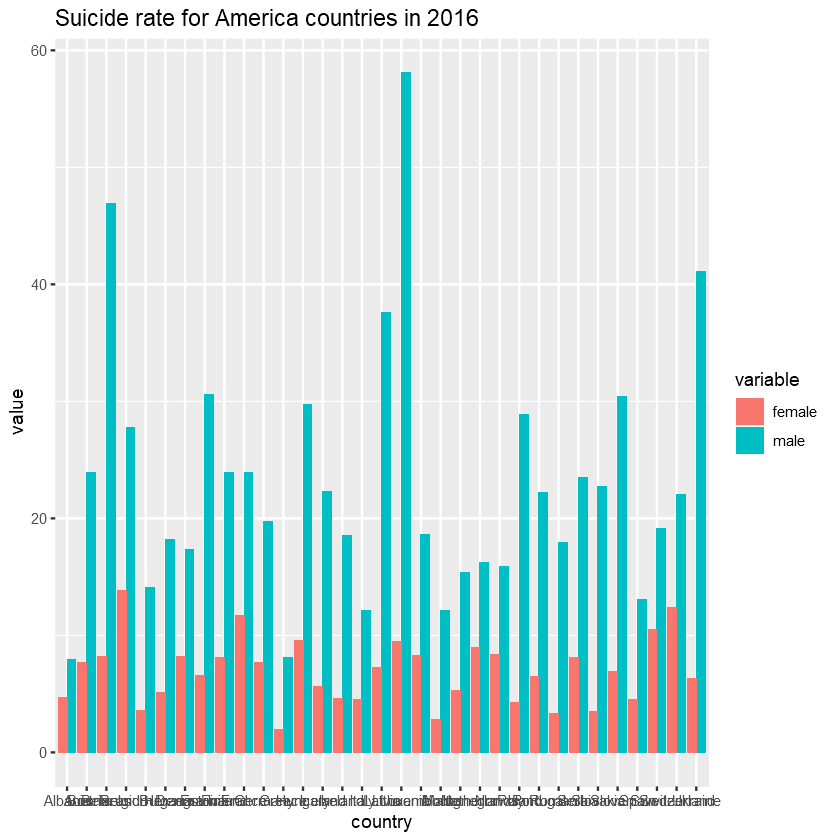

In [69]:
ggplot(Europe_rate, aes(x=country, y=value, fill=variable)) +
  geom_bar(stat="identity",position=position_dodge())+ggtitle("Suicide rate for America countries in 2016")


By comparing the graphs, we know that male tend to have a much higher suicide rate than female.

### Suicide rate VS. Log GDP

This part is to see is there any relatinship between suicide rate and GDP 

In [320]:
suicide_gdp <- suicide_happiness[,c(3,4,6,15,16)] #get data needed for GDP

In [321]:
suicide_gdp <- na.omit(suicide_gdp)
head(suicide_gdp)

country,year,Log.GDP.per.capita,Female,Male
Afghanistan,2010,7.416260,1.4,8.6
Afghanistan,2015,7.506759,1.5,7.8
Afghanistan,2016,7.497288,1.5,7.6
Albania,2010,9.145679,6.1,9.5
Albania,2015,9.249300,4.4,7.6
Albania,2016,9.282300,4.7,7.9


In [322]:
gdp_rate1 <- filter(suicide_gdp, year == 2016) #get data in 2016

In [323]:
df_gdp <- data.frame(country = gdp_rate1[,1])#get the country column

In [324]:
df_gdp$continent <- factor(countrycode(sourcevar = df_gdp[,"country"],
                                        origin = "country.name",
                                        destination = "continent")) ## add a continent column to the dataset

In [325]:
head(df_gdp)


country,continent
Afghanistan,Asia
Albania,Europe
Algeria,Africa
Armenia,Asia
Australia,Oceania
Austria,Europe


In [326]:
gdp_rate <- cbind(gdp_rate1, df_gdp)#combine the continent column to the original dataset

In [327]:
gdp_rate <- gdp_rate[,c(1,3,4,5,7)]

In [328]:
head(gdp_rate)

country,Log.GDP.per.capita,Female,Male,continent
Afghanistan,7.497288,1.5,7.6,Asia
Albania,9.282300,4.7,7.9,Europe
Algeria,9.549138,1.7,4.7,Africa
Armenia,8.989569,2.8,10.8,Asia
Australia,10.696281,7.0,19.5,Oceania
Austria,10.694595,7.7,23.9,Europe


### Suicide rate VS. Log GDP in Africa

In [331]:
Africa_gdp <- filter(gdp_rate, continent =="Africa") 

In [333]:
Africa_gdp <- Africa_gdp[,-5] %>%
  mutate(gdp = `Log.GDP.per.capita`) %>%
  select(-'Log.GDP.per.capita')

In [334]:
suicide <- Africa_gdp$Female+Africa_gdp$Male #combine the female and male suicide rate to get the overall rate for plot

In [335]:
Africa_gdp <- Africa_gdp[,-c(2,3)]

In [336]:
head(Africa_gdp)

country,gdp
Algeria,9.549138
Benin,7.621523
Botswana,9.624713
Burkina Faso,7.376117
Cameroon,8.020016
Chad,7.584248


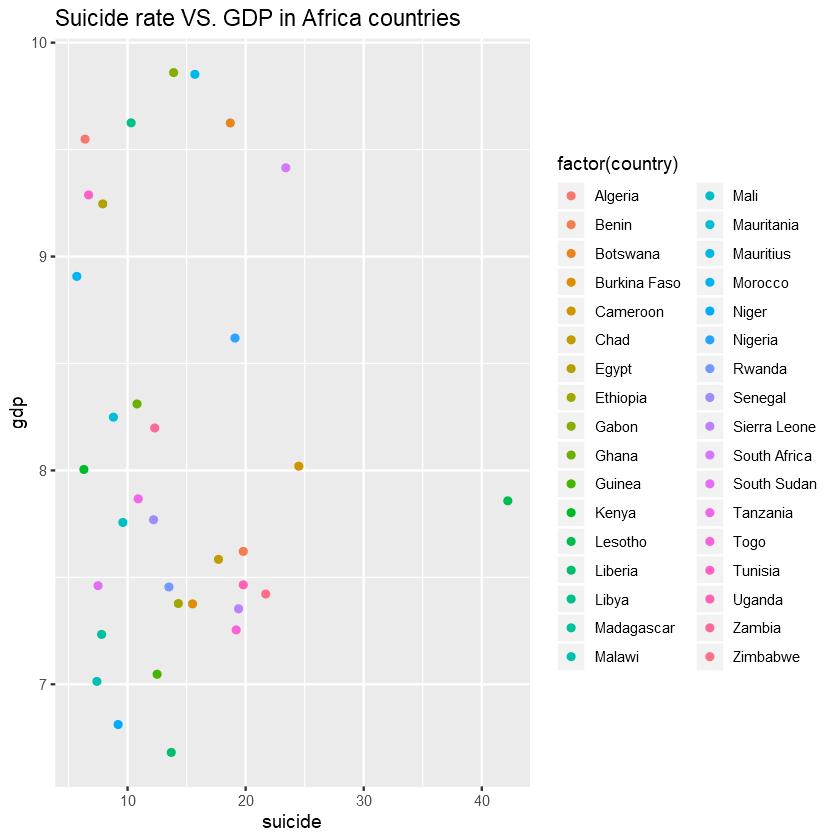

In [346]:
ggplot(Africa_gdp, aes(suicide, gdp)) + geom_point(aes(colour = factor(country))) +ggtitle("Suicide rate VS. GDP in Africa countries")#scatterplot

The plot shows the overall suicide rate in Africa in relation to GDP in that country. We can see there is no clear relationship between GDP and suicide rate. For example, Nigeria has a lower suicide rate with a lower GDP but Algeria has a higher GDP with a lower suicide rate as well.

### Suicide rate VS. Log GDP in America

In [350]:
Americas_gdp <- filter(gdp_rate, continent == "Americas")#get Americas data

In [351]:
Americas_gdp <- Americas_gdp[,-5] %>%
  mutate(gdp = `Log.GDP.per.capita`) %>%
  select(-'Log.GDP.per.capita') ##mutate the table 


In [352]:
head(Americas_gdp)

country,Female,Male,gdp
Brazil,3.1,10.0,9.525511
Canada,7.0,18.1,10.674513
Chile,4.0,17.2,10.010036
Colombia,2.8,11.6,9.486231
Costa Rica,2.4,13.5,9.609200
Dominican Republic,3.1,16.8,9.538721


In [353]:
suicide_America <- Americas_gdp$Female + Americas_gdp$Male ##combine female and male suicide rate

In [354]:
Americas_gdp <- cbind(Americas_gdp, suicide_America)

In [355]:
Americas_gdp <- Americas_gdp[,-c(2,3)]

In [356]:
head(Americas_gdp)

country,gdp,suicide_America
Brazil,9.525511,13.1
Canada,10.674513,25.1
Chile,10.010036,21.2
Colombia,9.486231,14.4
Costa Rica,9.609200,15.9
Dominican Republic,9.538721,19.9


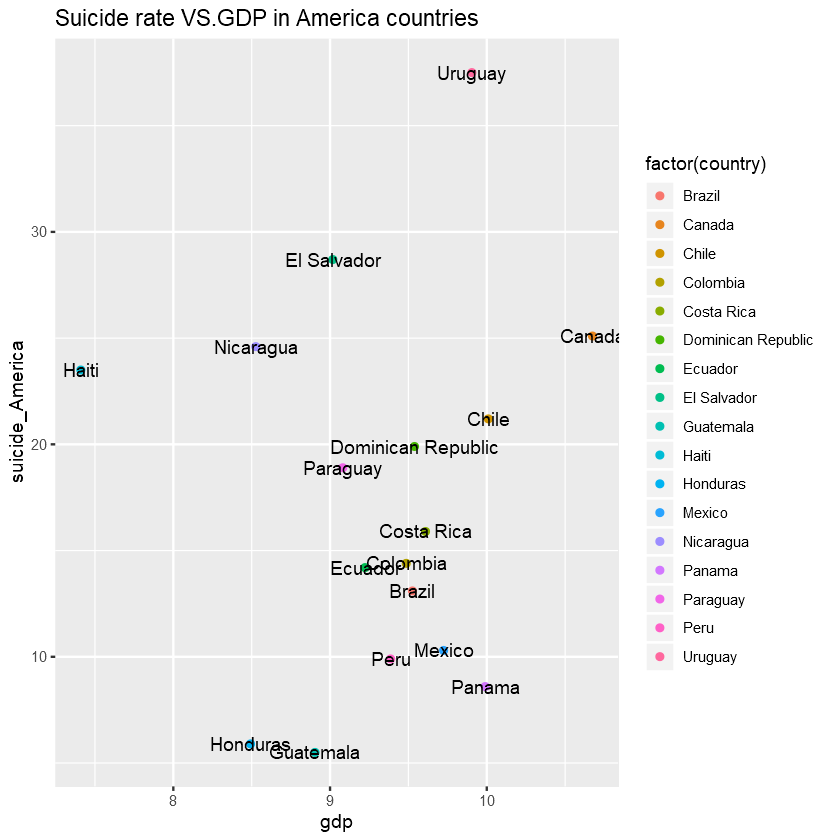

In [357]:
ggplot(Americas_gdp, aes(gdp, suicide_America)) + geom_point(aes(colour = factor(country)))+geom_text(aes(label = country)) + ggtitle("Suicide rate VS.GDP in America countries")

The relationship between gdp and suicide rate is also not clear in the plot for Americas countries. We are expecting to see a positive correlation or a negative correlation between two variables but the distribution of points didn't present any clear linearity.

### Suicide rate VS. Log GDP in Europe countries

In [358]:
Europe_gdp <- filter(gdp_rate, continent == "Europe")

In [360]:
Europe_gdp <- Europe_gdp[,-5] %>%
  mutate(gdp = `Log.GDP.per.capita`) %>%
  select(-'Log.GDP.per.capita')

In [361]:
suicide_Europe <- Europe_gdp$Female + Europe_gdp$Male

In [362]:
Europe_gdp <- cbind(Europe_gdp,suicide_Europe)

In [363]:
Europe_gdp <- Europe_gdp[,-c(2,3)]

In [364]:
head(Europe_gdp)

country,gdp,suicide_Europe
Albania,9.282300,12.6
Austria,10.694595,31.6
Belarus,9.684698,55.1
Belgium,10.632178,41.6
Bosnia and Herzegovina,9.240182,17.7
Bulgaria,9.766367,23.3


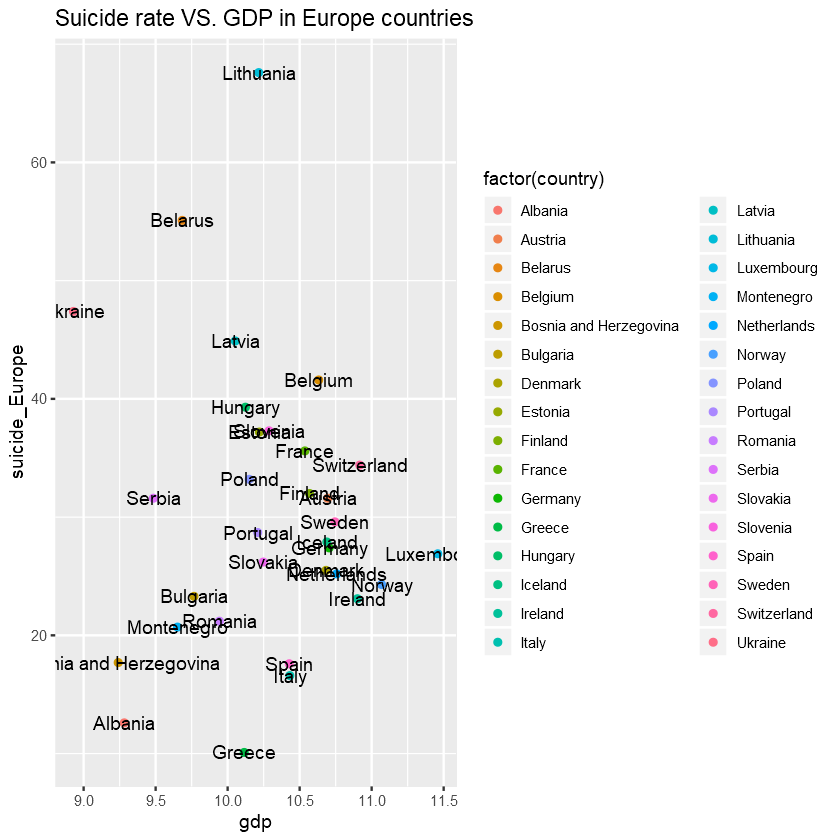

In [365]:
ggplot(Europe_gdp, aes(gdp, suicide_Europe)) + geom_point(aes(colour = factor(country))) +geom_text(aes(label=country))+ ggtitle("Suicide rate VS. GDP in Europe countries")

### Suicide rate VS. Log GDP in Asia countries

In [366]:
Asia_gdp <- filter(gdp_rate, continent=="Asia")

In [369]:
Asia_gdp <- Asia_gdp[,-5] %>%
  mutate(gdp = `Log.GDP.per.capita`) %>%
  select(-'Log.GDP.per.capita')

In [370]:
suicide_Asia <- Asia_gdp$Female+Asia_gdp$Male###combine female and male suicide rate

In [371]:
Asia_gdp <- cbind(Asia_gdp, suicide_Asia)

In [372]:
Asia_gdp <- Asia_gdp[,-c(2,3)]

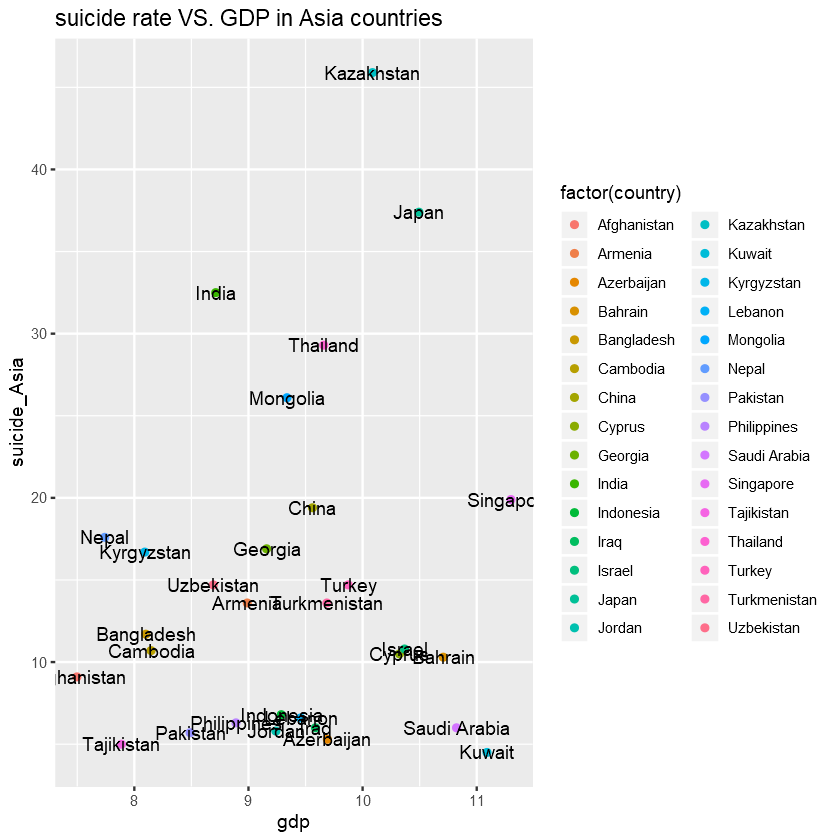

In [373]:
ggplot(Asia_gdp,aes(gdp, suicide_Asia)) + geom_point(aes(colour = factor(country))) + geom_text(aes(label=country))+ ggtitle("suicide rate VS. GDP in Asia countries")

No linearity shows in the above plot between gdp and suicide rate in Asia countries.

### Suicide rate VS.Log GDP in Oceania countries

In [374]:
Oceania_gdp <- filter(gdp_rate, continent=="Oceania")

In [375]:
Oceania_gdp <- Oceania_gdp[,-5] %>%
  mutate(gdp = `Log.GDP.per.capita`) %>%
  select(-'Log.GDP.per.capita')

In [376]:
suicide_Oceania <- Oceania_gdp$Female+Oceania_gdp$Male

In [377]:
Oceania_gdp <- cbind(Oceania_gdp, suicide_Oceania)

In [378]:
Oceania_gdp <- Oceania_gdp[,-c(2,3)]

In [379]:
print(Oceania_gdp)

      country      gdp suicide_Oceania
1   Australia 10.69628            26.5
2 New Zealand 10.46763            24.5


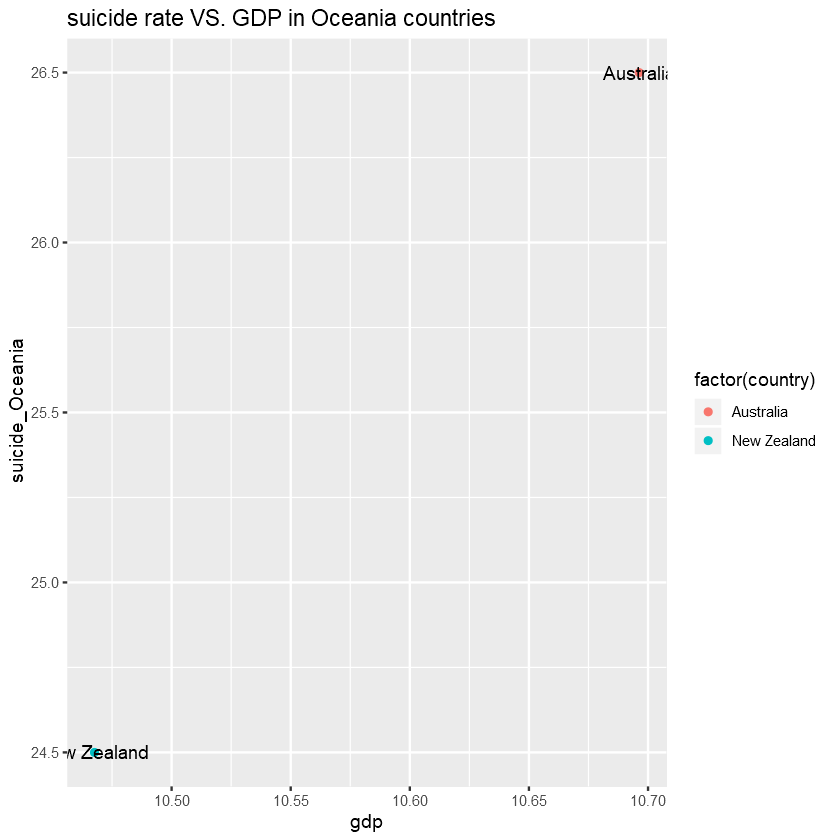

In [380]:
ggplot(Oceania_gdp,aes(gdp, suicide_Oceania)) + geom_point(aes(colour = factor(country)))+ geom_text(aes(label=country)) + ggtitle("suicide rate VS. GDP in Oceania countries")

In the suicide_happiness dataset, there are only two countries in Oceania, so we can see New Zealand has a lower GDP with a lowe suicide rate while Australia has a higher GDP with a higher suicide rate. But it doesn't suggest a positive correlation between GDP and suicide rate because the dataset size for Oceania is small.

### Suicide rate VS. Social support rate

In [381]:
support_rate <- suicide_happiness[,c(3,4,7,15,16)] ## get the columns needed from suicide happiness dataset

In [382]:
support_suicide <- cbind(support_rate, df_male[,2])

In [383]:
support_suicide <- na.omit(support_suicide)

In [384]:
colnames(support_suicide)

[1] "country"        "year"           "Social.support" "Female"        
[5] "Male"           "df_male[, 2]"

In [385]:
colnames(support_suicide) <- c("country", "year", "Social support", "Female", "Male", "continent")
    

In [386]:
support_suicide <- filter(support_suicide, year == 2016)##filter the dataset using year=2016

In [387]:
support_suicide <- support_suicide[,-2]

### Suicide rate VS. Social support rate in Asia

In [388]:
Asia_support <- filter(support_suicide, continent =="Asia")###filter the data for Asia countries 

In [389]:
Asia_support <- Asia_support[,-5] %>%
  mutate(support = `Social support`) %>%
  select(-'Social support')

In [390]:
Asia_suicide <- Asia_support$Female+Asia_support$Male##combine female and male suicide rate

In [391]:
Asia_support <- cbind(Asia_support, Asia_suicide)

In [392]:
Asia_support <- Asia_support[,-c(2,3)] ##drop the two columns for female and male suicide rate

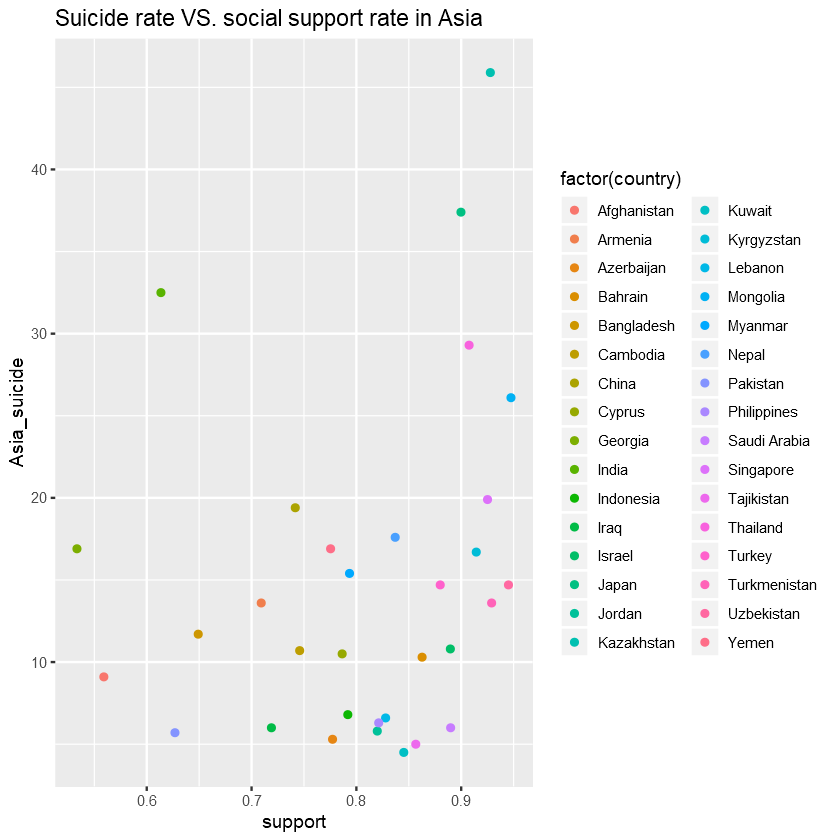

In [393]:
ggplot(Asia_support, aes(support, Asia_suicide)) + geom_point(aes(colour = factor(country))) + ggtitle("Suicide rate VS. social support rate in Asia")

There is a positive relationship between social support rate and suicide rate in Asia countries but there are some outliers as well as shown in the plot.

### Suicide rate and social support rate in Europe

In [394]:
Europe_support <- filter(support_suicide, continent=="Europe")

In [395]:
Europe_support <- Europe_support[,-5] %>%
  mutate(support = `Social support`) %>%
  select(-'Social support')

In [396]:
suicide_europe <- Europe_support$Female + Europe_support$Male

In [397]:
Europe_support <- cbind(Europe_support, suicide_europe)

In [398]:
Europe_support <- Europe_support[,-c(2,3)]

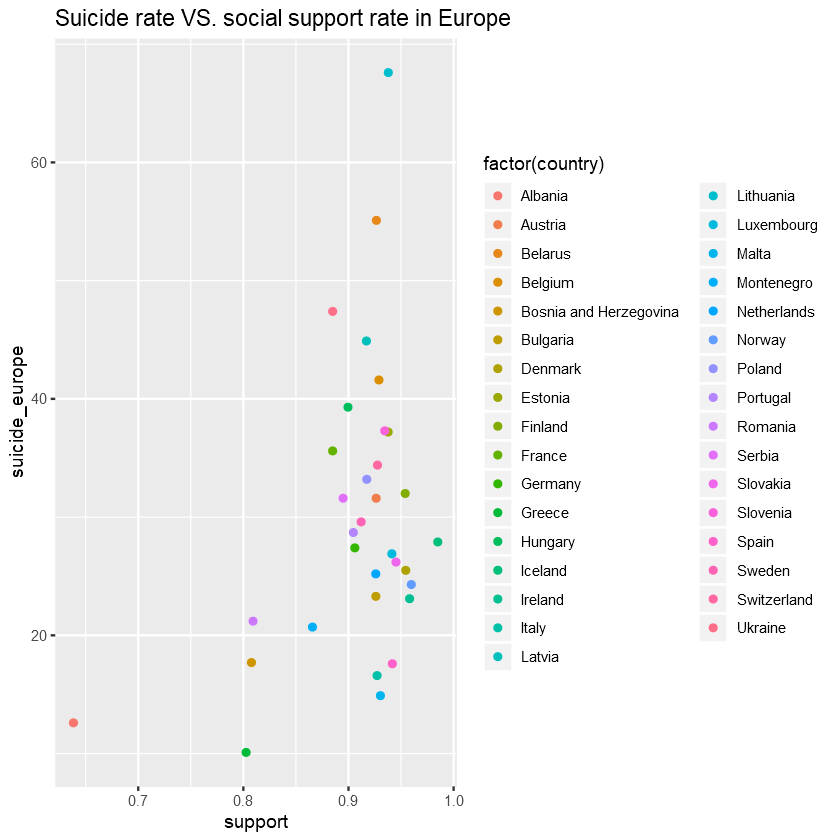

In [400]:
ggplot(Europe_support, aes(support, suicide_europe)) + geom_point(aes(colour = factor(country)))+  ggtitle("Suicide rate VS. social support rate in Europe")

Europe countries tend to have a generally higher social support rate compared with countries in other areas. However, the suicide rate varies. Lithuania has a higher social support rate but also a high suicide rate and Italy has a high social support rate but a much lower suicide rate.

### Suicide rate VS. Social support rate in Africa

In [401]:
Africa_support <- filter(support_suicide, continent =="Africa")

In [402]:
Africa_support <- Africa_support[,-5] %>%
  mutate(support = `Social support`) %>%
  select(-'Social support')

In [403]:
suicide_africa <- Africa_support$Female + Africa_support$Male

In [404]:
Africa_support <- cbind(Africa_support, suicide_africa)

In [405]:
Africa_support <- Africa_support[,-c(2,3)]

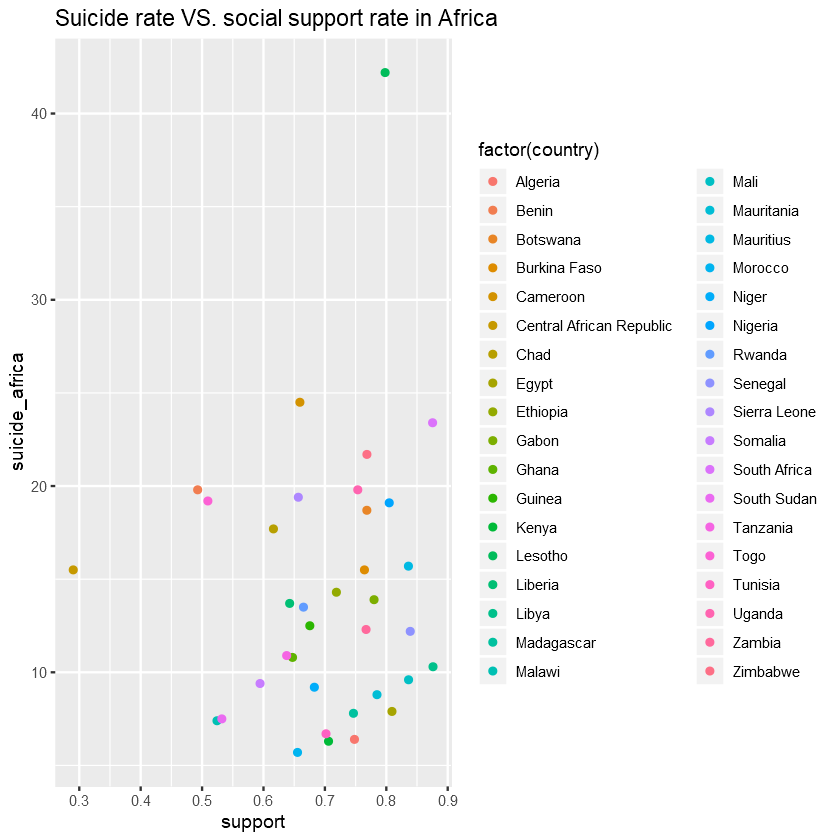

In [406]:
ggplot(Africa_support, aes(support, suicide_africa)) + geom_point(aes(colour = factor(country))) + ggtitle("Suicide rate VS. social support rate in Africa")

There is some linearity showing here. There is  one outlier showing in the plot. But generally, a positive correlation between social support rate showing here, a higher social support rate potentially suggest a higher suicide rate.

### Suicide rate VS. Social support rate in Americas

In [407]:
Americas_support <- filter(support_suicide, continent =="Americas")

In [408]:
Americas_support <- Americas_support[,-5] %>%
  mutate(support = `Social support`) %>%
  select(-'Social support')

In [409]:
suicide_americas <- Americas_support$Female + Americas_support$Male

In [410]:
Americas_support <- cbind(Americas_support, suicide_americas)

In [411]:
Americas_support <- Americas_support[,-c(2,3)]

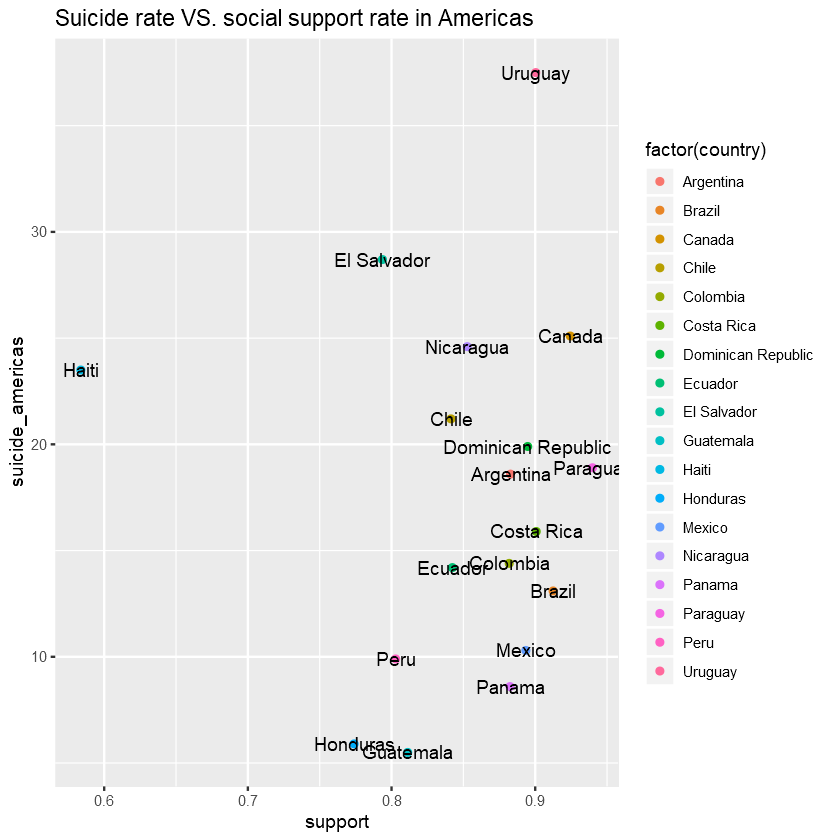

In [412]:
ggplot(Americas_support, aes(support, suicide_americas)) + geom_point(aes(colour = factor(country)))+ geom_text(aes(label=country)) + ggtitle("Suicide rate VS. social support rate in Americas")

There is also a linearity showing here.  A higher social support rate potentially suggest a higher suicide rate, but similar as the above plot, the relationship was not very clear either.

### Suicide rate VS. Socal support rate in Oceania

In [413]:
Oceania_support <- filter(support_suicide, continent =="Oceania")#get Oceania dataset

In [414]:
Oceania_support <- Oceania_support[,-5] %>%
  mutate(support = `Social support`) %>%
  select(-'Social support') #mutate the table so the social support colummn now have another name"support"

In [415]:
suicide_Oceaniacountry <- Oceania_support$Female + Oceania_support$Male
#combine male and female suicide rate

In [416]:
Oceania_support <- cbind(Oceania_support, suicide_Oceaniacountry)
#combine the new suicide rate created with the original dataset

In [417]:
Oceania_support <- Oceania_support[,-c(2,3)]
#drop the female and male columns

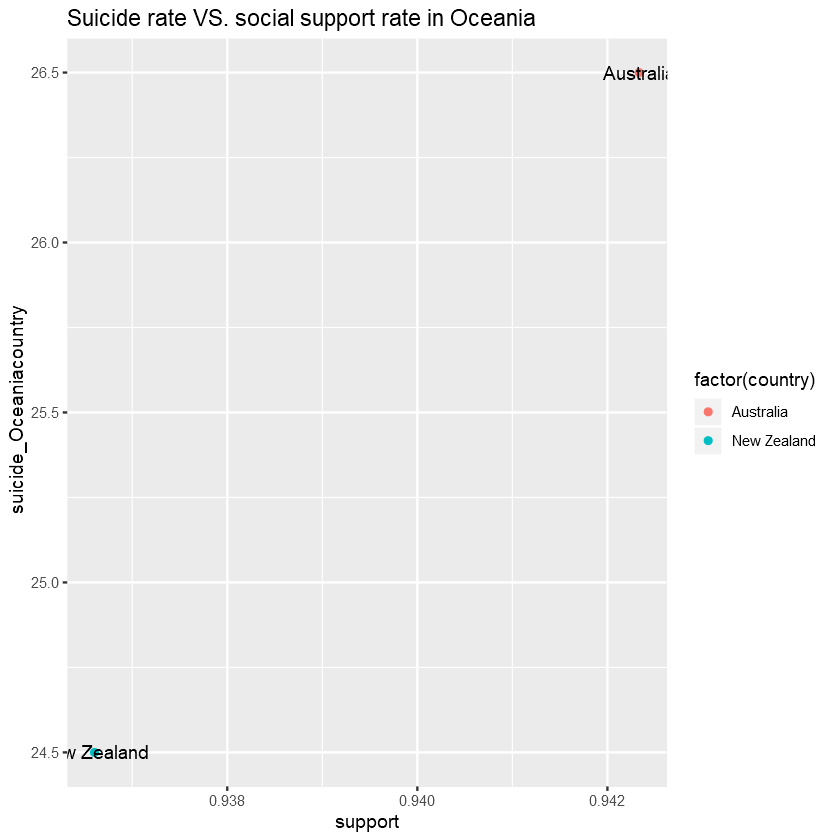

In [418]:
ggplot(Oceania_support, aes(support, suicide_Oceaniacountry)) + geom_point(aes(colour = factor(country)))+ geom_text(aes(label=country)) + ggtitle("Suicide rate VS. social support rate in Oceania")

Again, only two countries in Oceania datatable, so there is not enough data to see the relationship between social support rate and suicide rate in Oceania.

## Suicide rate VS. Healthy life expectancy rate at birth

In [419]:
expectancy_rate <- suicide_happiness[,c(3,4,8,15,16)] ##select the columns needed from the original dataset.

In [420]:
expectancy_suicide <- cbind(expectancy_rate, df_male[,2]) ##combine the dataset with the continent column ceated earlier

In [421]:
colnames(expectancy_suicide) <- c("country", "year","Healthy life expectancy at birth" ,"Female", "Male", "continent")
#rename columns

In [422]:
expectancy_suicide <- filter(expectancy_suicide, year == 2016)
#filter the data with year=2016

In [423]:
head(expectancy_suicide)

country,year,Healthy life expectancy at birth,Female,Male,continent
Afghanistan,2016,49.87127,1.5,7.6,Asia
Albania,2016,68.69838,4.7,7.9,Europe
Algeria,2016,64.82995,1.7,4.7,Africa
Argentina,2016,67.44399,3.5,15.1,Americas
Armenia,2016,65.40947,2.8,10.8,Asia
Australia,2016,72.52163,7.0,19.5,Oceania


In [424]:
expectancy_suicide <- expectancy_suicide[,-2] #drop the year column because we are now only looking at 2016 data

### Suicide rate VS. Healthy life expectancy rate in Asia

In [425]:
Asia_healthy <- filter(expectancy_suicide, continent =="Asia")#get Asia countries

In [426]:
Asia_healthy <- Asia_healthy[,-5] %>%
  mutate(expectancy = `Healthy life expectancy at birth`) %>%
  select(-'Healthy life expectancy at birth')#mutate datatable

In [427]:
asiasuicide <- Asia_healthy$Female + Asia_healthy$Male #combine female and male dataset

In [428]:
Asia_healthy <- cbind(Asia_healthy, asiasuicide)#add the overall suicide rate to the original dataset

In [429]:
Asia_healthy <- Asia_healthy[,-c(2,3)] #drop female and male columns

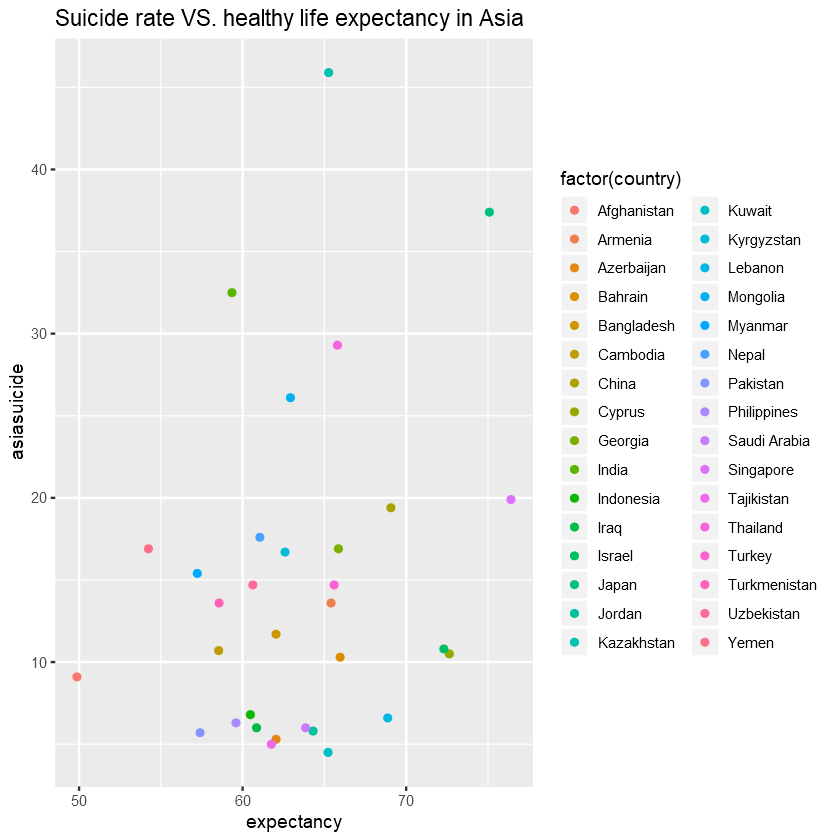

In [430]:
ggplot(Asia_healthy, aes(expectancy, asiasuicide)) + geom_point(aes(colour = factor(country))) + ggtitle("Suicide rate VS. healthy life expectancy in Asia")

There is not a strong linearity showing here about the healthy life expectancy rate and suicide rate in Asia.

### Suicide rate VS. Healthy life expectancy rate in Africa

In [431]:
Africa_healthy <- filter(expectancy_suicide, continent =="Africa") #get Africa data

In [432]:
Africa_healthy <- Africa_healthy[,-5] %>%
  mutate(expectancy = `Healthy life expectancy at birth`) %>%
  select(-'Healthy life expectancy at birth')#mutate datatable

In [433]:
africasuicide <- Africa_healthy$Female + Africa_healthy$Male #combine male and female suicide rate

In [434]:
Africa_healthy <- cbind(Africa_healthy, africasuicide)

In [435]:
Africa_healthy <- Africa_healthy[,-c(2,3)]

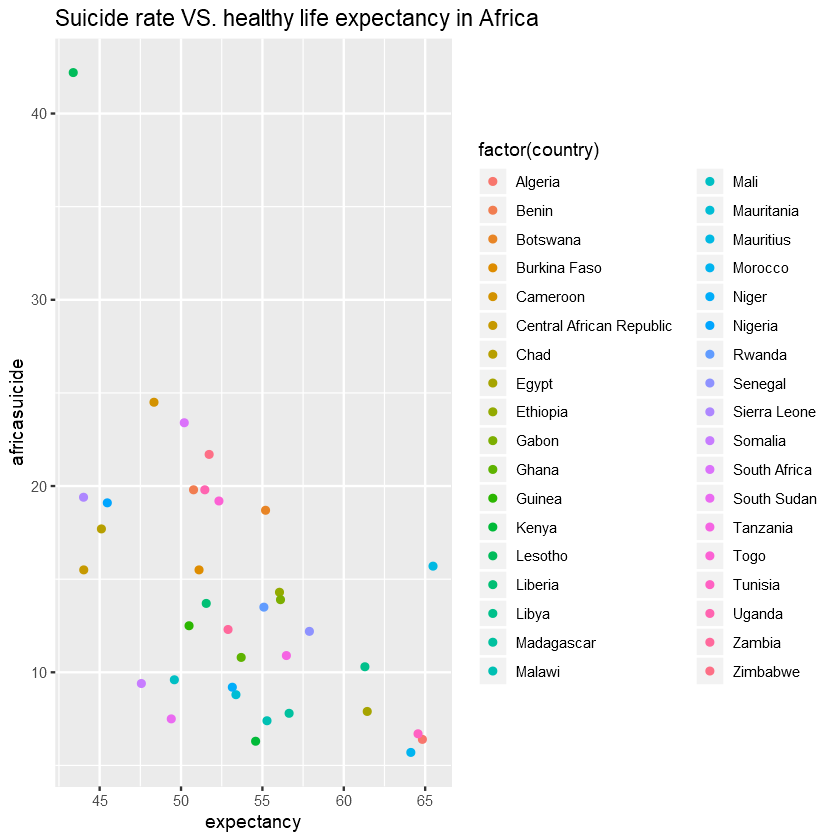

In [215]:
ggplot(Africa_healthy, aes(expectancy, africasuicide)) + geom_point(aes(colour = factor(country))) + ggtitle("Suicide rate VS. healthy life expectancy in Africa")

There is a loosely negative correlation between healthy life expectancy rate and suicide rate in Africa countries while a higher healthy life expectacy rate suggest a lower suicide rate but the relationship is also not strong.

### Suicide rate VS. Healthy life expectancy rate in Europe coutries

In [436]:
Europe_healthy <- filter(expectancy_suicide, continent =="Europe")

In [437]:
Europe_healthy <- Europe_healthy[,-5] %>%
  mutate(expectancy = `Healthy life expectancy at birth`) %>%
  select(-'Healthy life expectancy at birth')

In [438]:
europesuicide <- Europe_healthy$Female + Europe_healthy$Male

In [439]:
Europe_healthy <- cbind(Europe_healthy, europesuicide)

In [440]:
Europe_healthy <- Europe_healthy[,-c(2,3)]

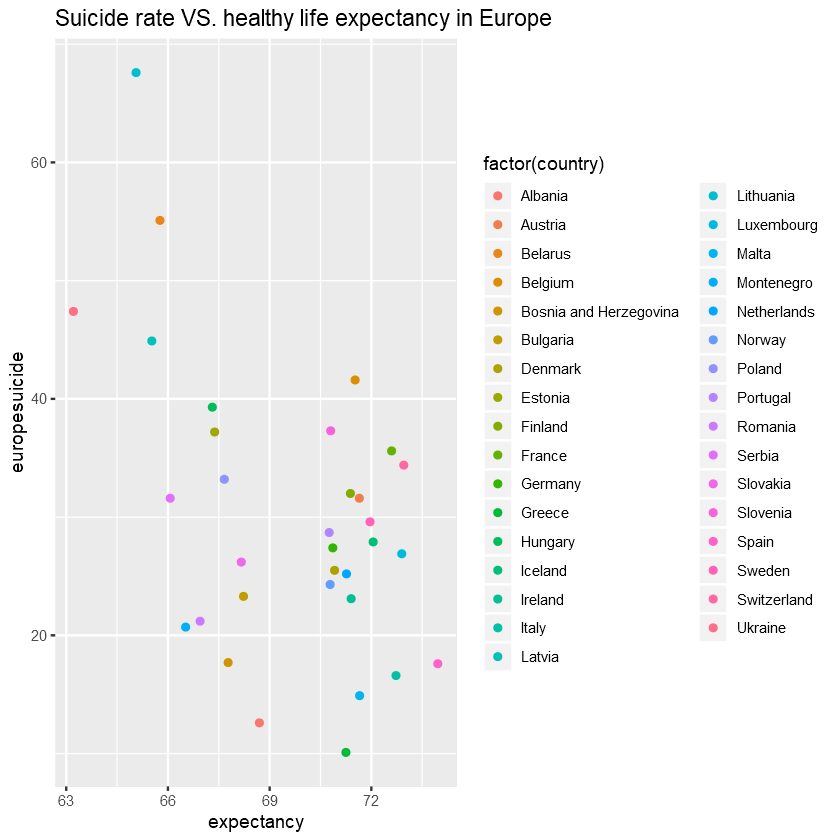

In [441]:
ggplot(Europe_healthy, aes(expectancy, europesuicide)) + geom_point(aes(colour = factor(country))) + ggtitle("Suicide rate VS. healthy life expectancy in Europe")

There is no clear correlation here in the plot for Europe countries.

### Suicide rate VS. Healthy life expectancy rate in Oceania countries

In [442]:
Oceania_healthy <- filter(expectancy_suicide, continent =="Oceania")

In [443]:
Oceania_healthy <- Oceania_healthy[,-5] %>%
  mutate(expectancy = `Healthy life expectancy at birth`) %>%
  select(-'Healthy life expectancy at birth')

In [444]:
Oceaniasuicide <- Oceania_healthy$Female +Oceania_healthy$Male

In [445]:
Oceania_healthy <- cbind(Oceania_healthy, Oceaniasuicide)

In [446]:
Oceania_healthy <- Oceania_healthy[,-c(2,3)]

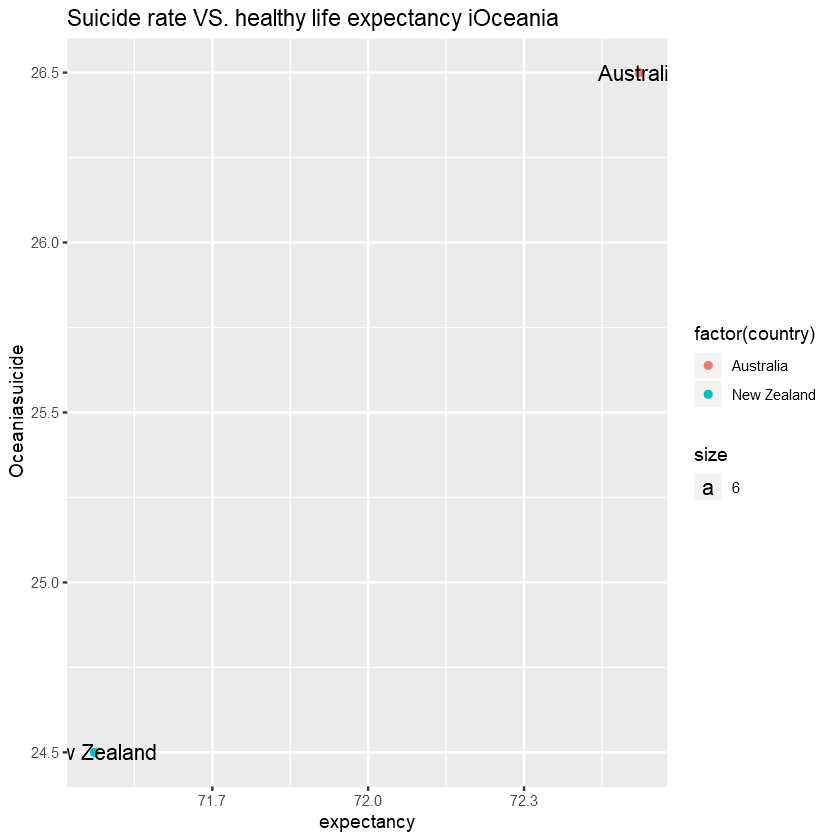

In [448]:
ggplot(Oceania_healthy, aes(expectancy, Oceaniasuicide)) + geom_point(aes(colour = factor(country))) + geom_text(aes(label=country, size=6))+ ggtitle("Suicide rate VS. healthy life expectancy iOceania")

Only two countries in this dataset, so we can't see whether there is a clear correlation here.